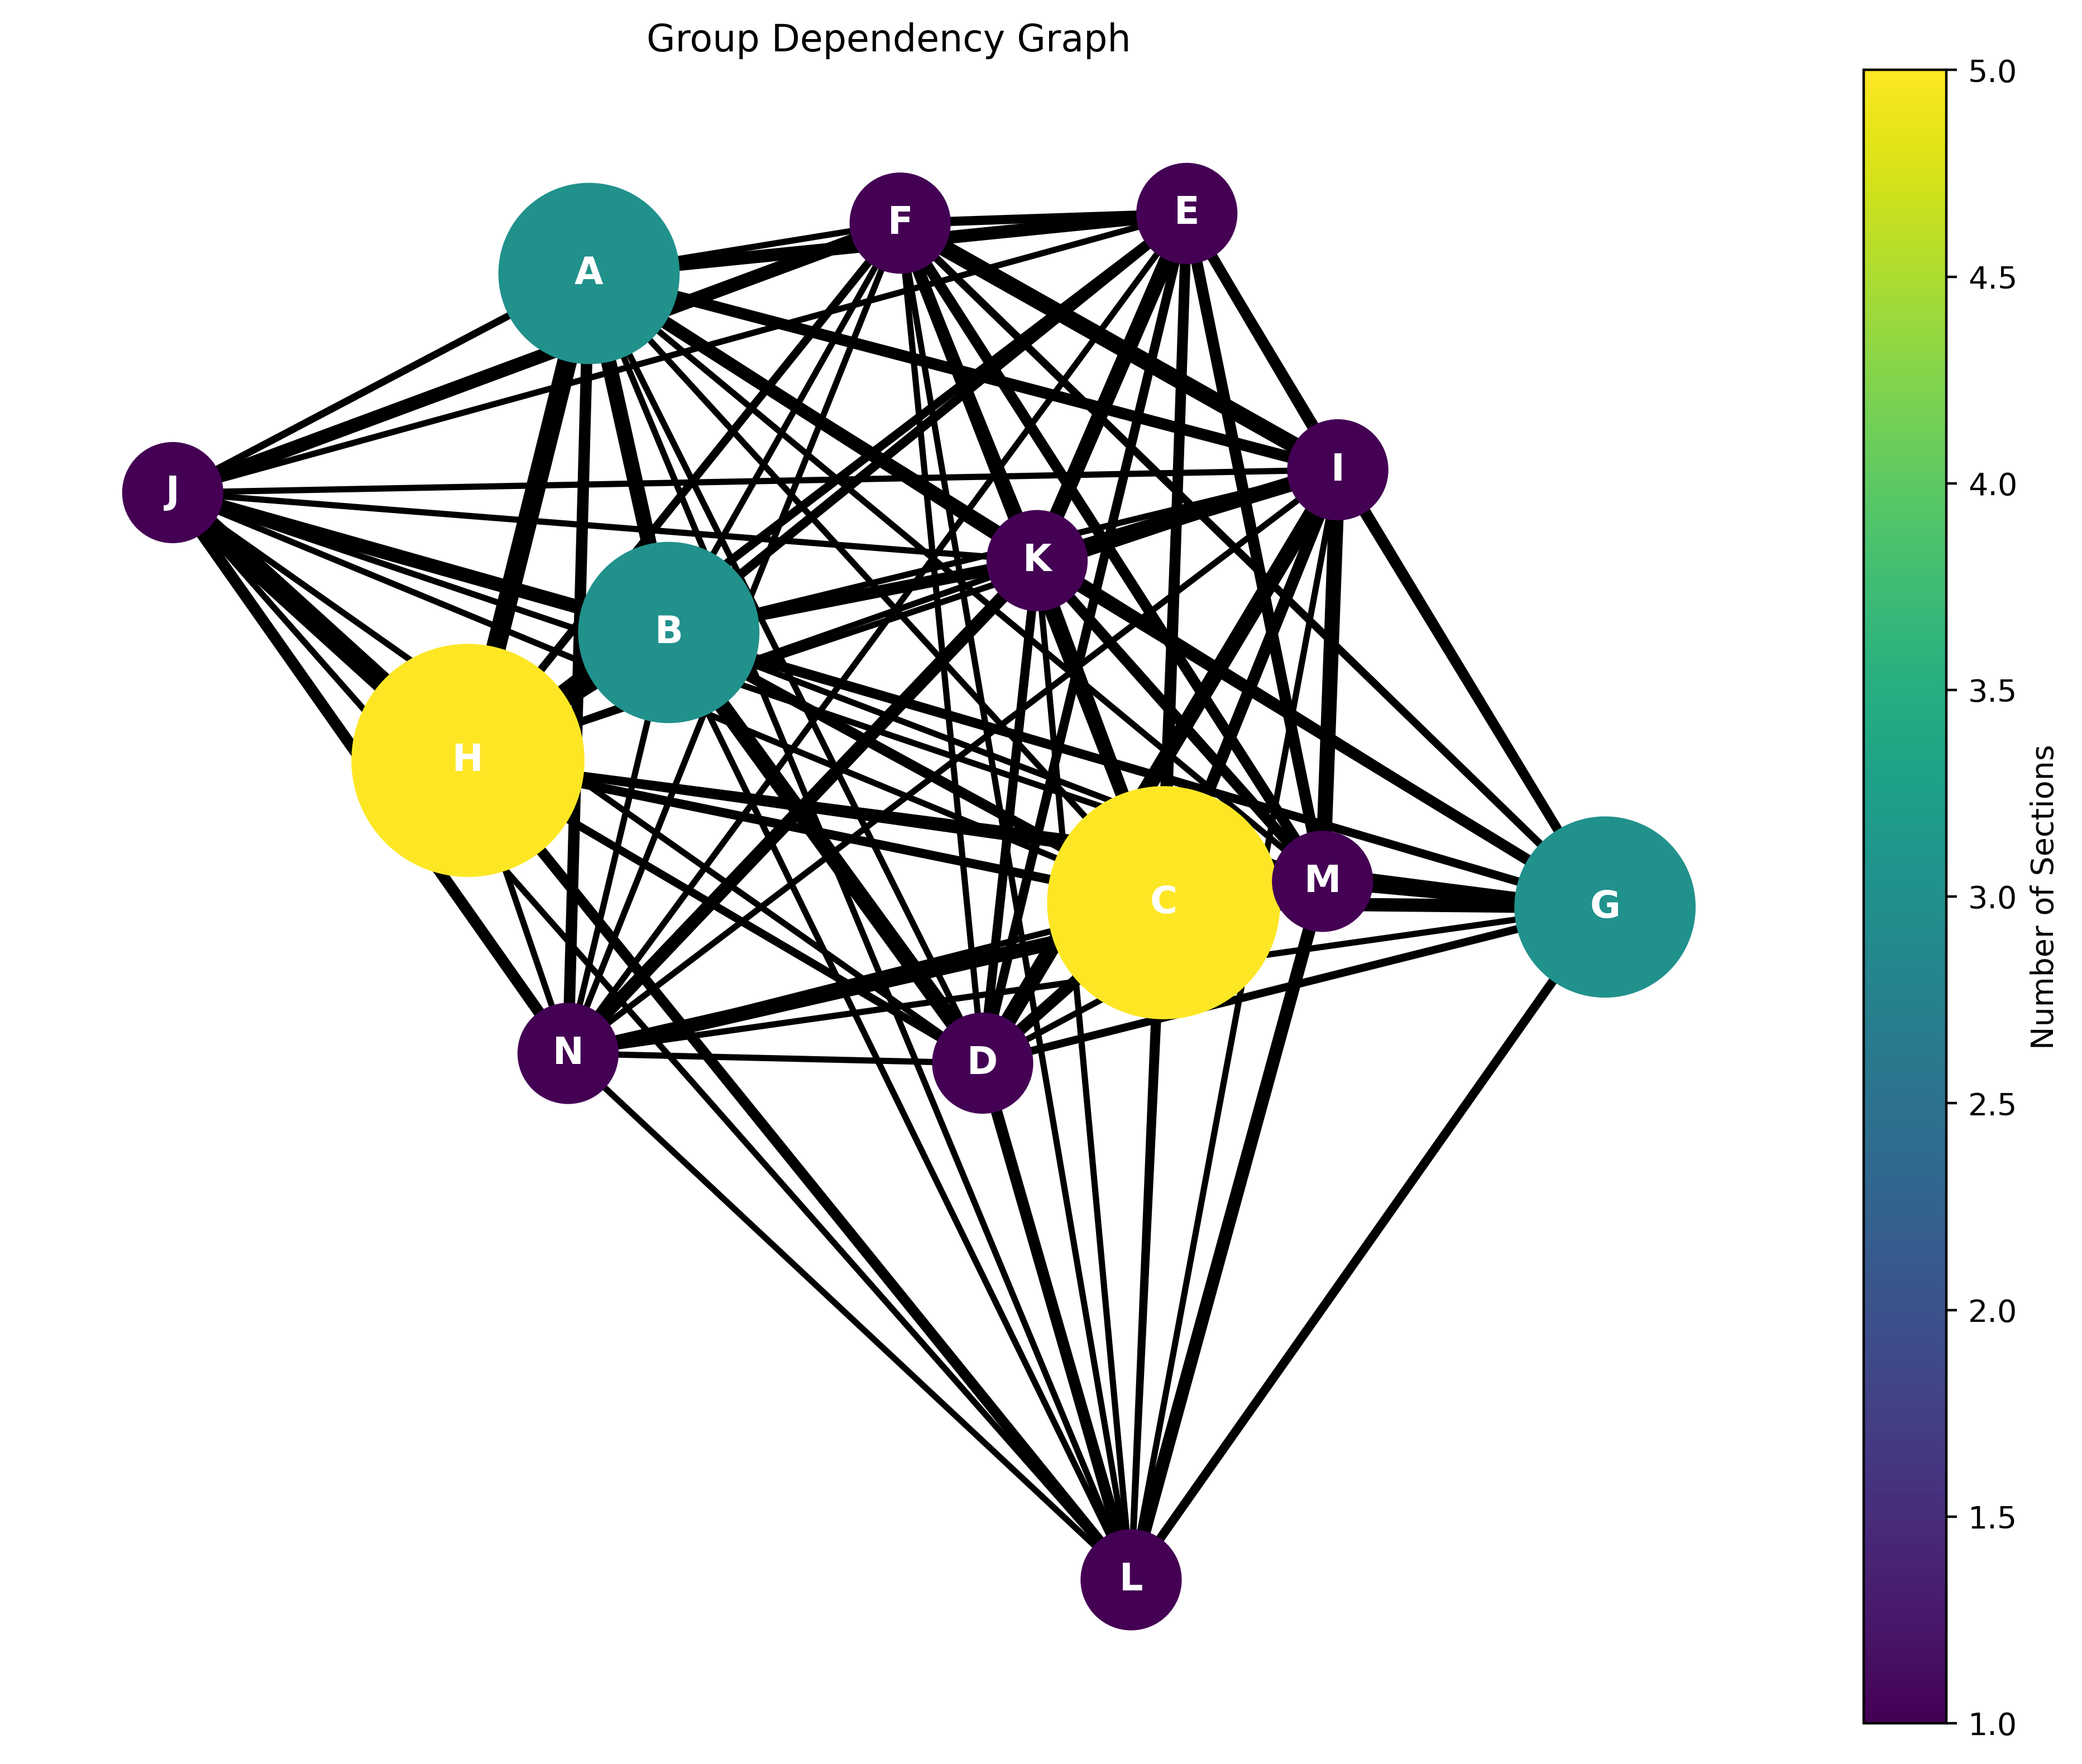


🟦 Node Section Count Table:
Node  Section Count
   A              3
   B              3
   C              5
   D              1
   E              1
   F              1
   G              3
   H              5
   I              1
   J              1
   K              1
   L              1
   M              1
   N              1

⬛ Edge Weight Table:
From To    Weight
   A  C  0.000000
   A  D  0.000000
   A  K  9.000000
   A  E  9.000000
   A  I  7.000000
   A  F  0.000000
   A  G  0.000000
   A  L  0.000000
   A  H 18.066667
   A  M  0.000000
   A  J  1.333333
   A  B 12.222222
   A  N  7.000000
   B  C  5.533333
   B  D 13.333333
   B  K  8.000000
   B  E  4.000000
   B  I  0.000000
   B  F  0.000000
   B  G  3.000000
   B  L  0.000000
   B  H 16.333333
   B  M  0.000000
   B  J 10.333333
   B  N  0.000000
   C  H  3.920000
   C  J  0.000000
   C  M  3.400000
   C  N  0.000000
   C  D  7.400000
   C  K  7.000000
   C  G  9.533333
   C  E  6.000000
   C  I  7.600000
   C  F  8.200000
 

In [9]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Load the graph
with open('group_dependency_graph.pkl', 'rb') as file:
    G = pickle.load(file)

# Step 1: Map original node names to A, B, C... and count sections
original_nodes = list(G.nodes())
node_labels = {orig: chr(65 + i) for i, orig in enumerate(original_nodes)}
G = nx.relabel_nodes(G, node_labels)

section_counts = {node_labels[orig]: len(orig.split(',')) for orig in original_nodes}

# Step 2: Setup viridis colormap based on section count
counts = list(section_counts.values())
norm = mcolors.Normalize(vmin=min(counts), vmax=max(counts))
cmap = plt.colormaps['viridis']
node_colors = [cmap(norm(section_counts[n])) for n in G.nodes()]

# Step 3: Get edge weights and map to thickness
weights = nx.get_edge_attributes(G, 'weight')
max_weight = max(weights.values()) if weights else 1
edge_widths = [(weights[(u, v)] / max_weight * 5 + 2) for u, v in G.edges()]

# Step 4: Draw graph
fig, ax = plt.subplots(figsize=(10, 8), dpi=400)
pos = nx.spring_layout(G, seed=42)
# Adjust node sizes based on section count
base_node_size = 1000
node_sizes = [
    base_node_size if section_counts[n] == 1 else base_node_size * 1.1 * section_counts[n]
    for n in G.nodes()
]

# Draw nodes with dynamic size and color
nodes = nx.draw_networkx_nodes(
    G, pos, ax=ax,
    node_size=node_sizes,
    node_color=node_colors
)

nx.draw_networkx_labels(G, pos, ax=ax, font_color='white', font_weight='bold')
nx.draw_networkx_edges(G, pos, ax=ax, width=edge_widths, edge_color='black')

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required only for older matplotlib
cbar = plt.colorbar(sm, ax=ax, label='Number of Sections')

plt.title("Group Dependency Graph", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.savefig("group_dependency_graph_visual.png", dpi=400)
plt.show()

# Step 5: Tables
node_table = pd.DataFrame([
    {'Node': node, 'Section Count': count}
    for node, count in section_counts.items()
])

edge_table = pd.DataFrame([
    {'From': u, 'To': v, 'Weight': w}
    for (u, v), w in weights.items()
])

print("\n🟦 Node Section Count Table:")
print(node_table.to_string(index=False))

print("\n⬛ Edge Weight Table:")
print(edge_table.to_string(index=False))
